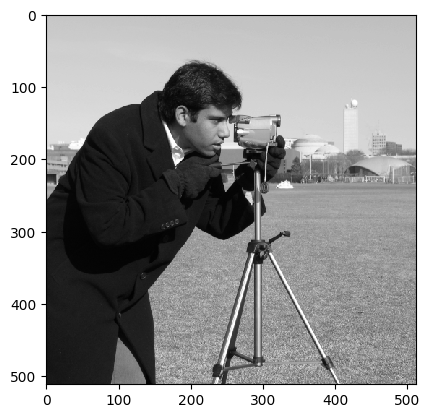

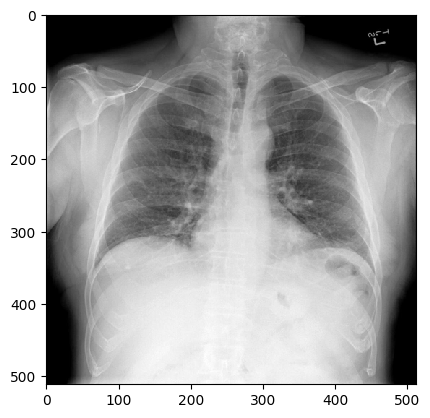

In [1]:
import matplotlib.pyplot as plt
from skimage import io,data
from metrics.emee import emee
from metrics.contrast_pixel import contrast_img
from algorithms.edge_detection import edge_detection,space_edge_detection

a=data.camera()
b=io.imread('CXR7_IM-2263-1001.png')

plt.imshow(a,cmap='gray',interpolation='nearest')
plt.show()
plt.imshow(b, cmap='gray', interpolation='nearest') 
plt.show()

In [2]:
from models.lip import LIPImage,LIPSpace
from models.hlip import HLIPImage,HLIPSpace
from models.pslip import PSLIPImage,PSLIPSpace
from models.slip import SLIPSpace
from models.plip import PLIPSpace
from models.ppslip import PPSLIPSpace

In [3]:
import numpy as np
from skimage.filters import scharr

### Lineal

Lossy conversion from float64 to uint8. Range [0.0, 254.99999999999997]. Convert image to uint8 prior to saving to suppress this warning.


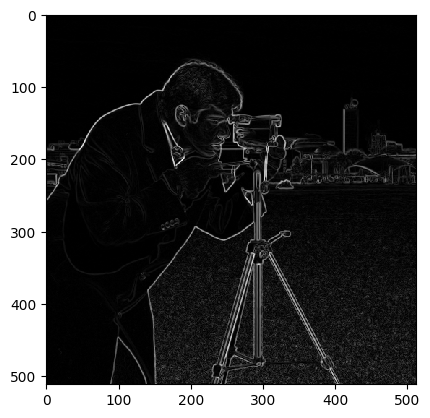

4.691651735295838


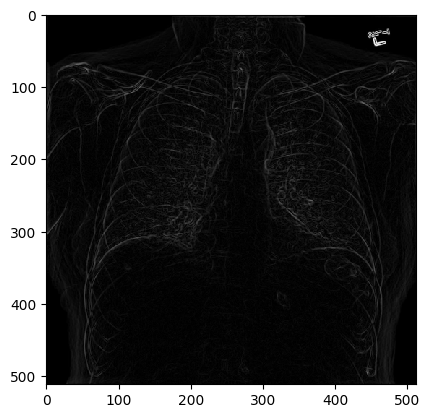

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


2.8981394703992924


In [4]:
la=np.array(a.tolist())

sla=edge_detection(la,scharr)

sla=sla*255/np.max(sla)

io.imsave('sla.png',sla)

plt.imshow(sla,cmap='gray',interpolation='nearest')
plt.show()

sla=io.imread('sla.png')
print(contrast_img(sla,256,2))

lb=np.array(b.tolist())

slb=edge_detection(lb,scharr)

slb=slb*255/np.max(slb)

plt.imshow(slb,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('slb.png',slb)

slb=io.imread('slb.png')
print(contrast_img(slb,256,2))

### LIP

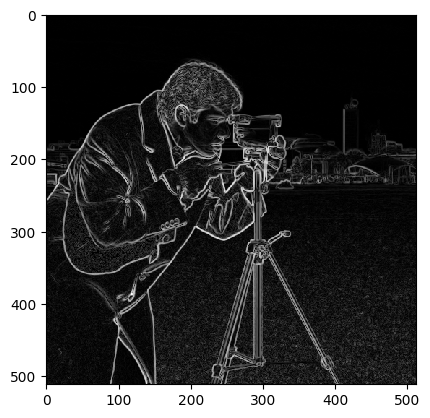

Lossy conversion from float64 to uint8. Range [0.0, 255.6998389853814]. Convert image to uint8 prior to saving to suppress this warning.


7.432248516434516


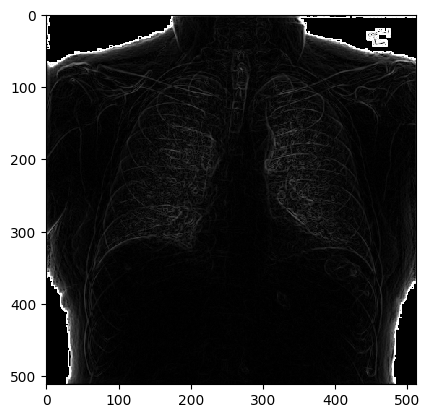

Lossy conversion from float64 to uint8. Range [0.0, 255.99949493568909]. Convert image to uint8 prior to saving to suppress this warning.


3.668321118261541


In [5]:
js=LIPSpace()

sja=js.M-space_edge_detection(a,scharr,js)

plt.imshow(sja,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('sja.png',sja)

sja=io.imread('sja.png')
print(contrast_img(sja,256,2))

sjb=js.M-space_edge_detection(b,scharr,js)

plt.imshow(sjb,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('sjb.png',sjb)

sjb=io.imread('sjb.png')
print(contrast_img(sjb,256,2))

### HLIP

Lossy conversion from float64 to uint8. Range [128.0, 255.71038208955534]. Convert image to uint8 prior to saving to suppress this warning.


8.058598884606777


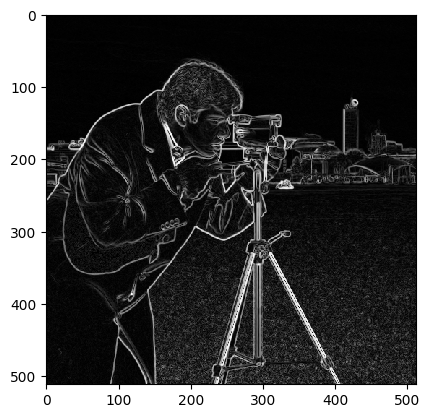

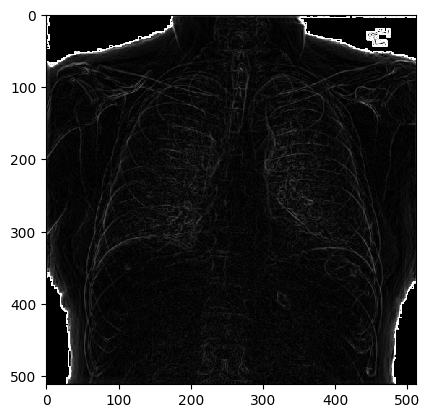

Lossy conversion from float64 to uint8. Range [128.0, 255.99963763455003]. Convert image to uint8 prior to saving to suppress this warning.


4.407599362949134


In [6]:

hs=HLIPSpace()

sha=space_edge_detection(a,scharr,hs)

io.imsave('sha.png',sha)

sha=io.imread('sha.png')
print(contrast_img(sha,256,2))

plt.imshow(sha,cmap='gray',interpolation='nearest')
plt.show()

shb=space_edge_detection(b,scharr,hs)

plt.imshow(shb,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('shb.png',shb)

shb=io.imread('shb.png')
print(contrast_img(shb,256,2))

### PSLIP

Lossy conversion from float64 to uint8. Range [0.0, 254.7903756697706]. Convert image to uint8 prior to saving to suppress this warning.


9.41499018503569


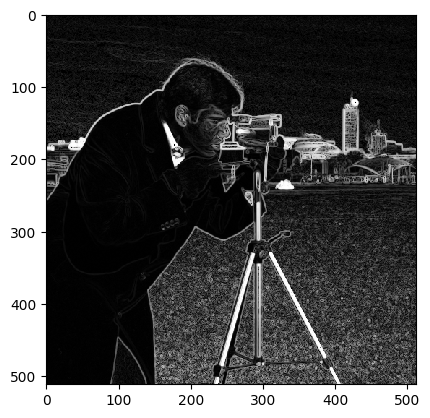

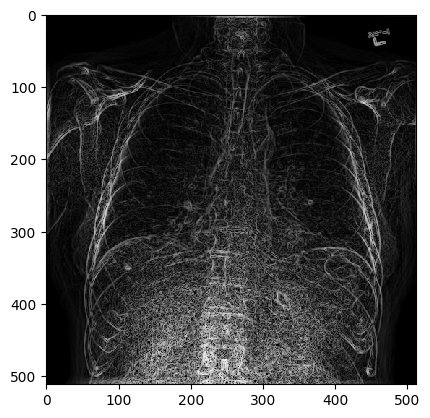

Lossy conversion from float64 to uint8. Range [0.0, 222.38384226043544]. Convert image to uint8 prior to saving to suppress this warning.


9.736930066397557


In [7]:

pss=PSLIPSpace()

spsa=space_edge_detection(a,scharr,pss)

io.imsave('spsa.png',spsa)

spsa=io.imread('spsa.png')
print(contrast_img(spsa,256,2))

plt.imshow(spsa,cmap='gray',interpolation='nearest')
plt.show()

spsb=space_edge_detection(b,scharr,pss)

plt.imshow(spsb,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('spsb.png',spsb)

spsb=io.imread('spsb.png')
print(contrast_img(spsb,256,2))

## SLIP

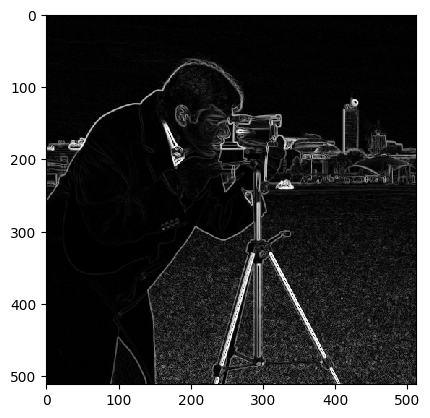

Lossy conversion from float64 to uint8. Range [0.0, 251.375358091689]. Convert image to uint8 prior to saving to suppress this warning.


6.265150186296825


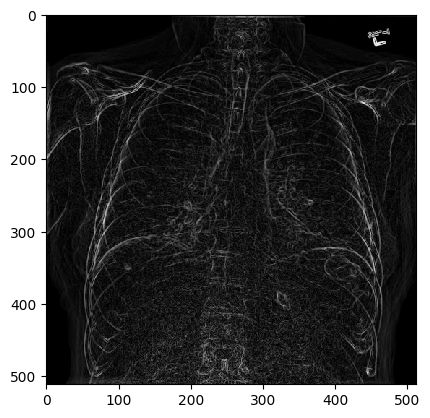

Lossy conversion from float64 to uint8. Range [0.0, 128.72941729621033]. Convert image to uint8 prior to saving to suppress this warning.


6.858093361972525


In [8]:
ss=SLIPSpace()

ssa=space_edge_detection(a,scharr,ss)

plt.imshow(ssa,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('ssa.png',ssa)

ssa=io.imread('ssa.png')
print(contrast_img(ssa,256,2))

ssb=space_edge_detection(b,scharr,ss)

plt.imshow(ssb,cmap='gray',interpolation='nearest')
plt.show()

io.imsave('ssb.png',ssb)

ssb=io.imread('ssb.png')
print(contrast_img(ssb,256,2))

# PLIP

Lossy conversion from float64 to uint8. Range [0.0, 255.69983898538158]. Convert image to uint8 prior to saving to suppress this warning.


40.16095279179069
4100
7.432248516434516


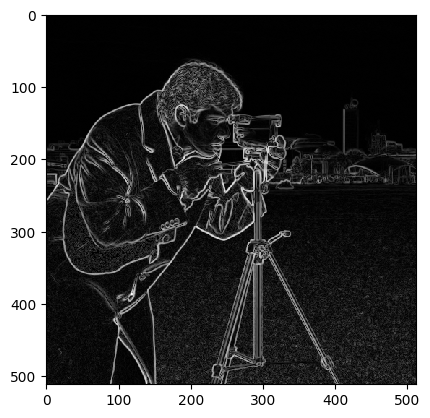

In [19]:

mus=[256,400,500,800,1000,1026,4100,600,300]

ps=PLIPSpace()

lambd=256

pa=ps.function(ps.gray_tone(a),lambd)

aux=ps.inverse_function(scharr(pa),lambd)

d_1 = 4 if pa.shape[0]%4==0 else 5
d_2 = 4 if pa.shape[1]%4==0 else 5

max_emee=-1
max_mu=-1

for mu in mus:
    max_pi_r=np.max(aux)
    if mu < max_pi_r:
        continue
    result=mu-ps.inverse_gray_tone(aux,mu)
    actual_emee=emee(result,1,d_1,d_2,0.5)
    if actual_emee > max_emee:
        max_emee=actual_emee
        max_mu=mu

spa=max_mu-ps.inverse_gray_tone(aux,max_mu)
print(max_emee)
print(max_mu)

io.imsave('spa.png',spa)
spa=io.imread('spa.png')
print(contrast_img(spa,256,2))
plt.imshow(spa,cmap='gray',interpolation='nearest')

Lossy conversion from float64 to uint8. Range [0.0, 255.9994949356892]. Convert image to uint8 prior to saving to suppress this warning.


71.05715975688744
4100
3.668321118261541


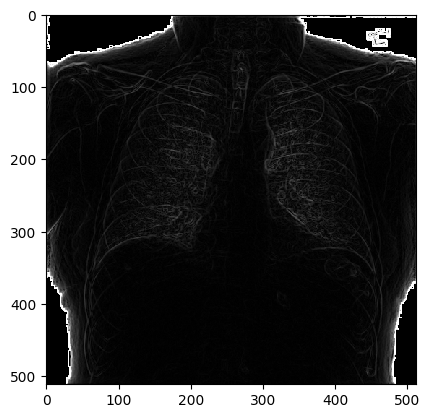

In [24]:
mus=[256,400,500,800,1000,1026,4100,600,300]

ps=PLIPSpace()

lambd=256

pb=ps.function(ps.gray_tone(b),lambd)

aux=ps.inverse_function(scharr(pb),lambd)

d_1 = 4 if pb.shape[0]%4==0 else 5
d_2 = 4 if pb.shape[1]%4==0 else 5

max_emee=-1
max_mu=-1

for mu in mus:
    max_pi_r=np.max(aux)
    if mu < max_pi_r:
        continue
    result=mu-ps.inverse_gray_tone(aux,mu)
    actual_emee=emee(result,1,d_1,d_2,0.5)
    if actual_emee > max_emee:
        max_emee=actual_emee
        max_mu=mu

spb=max_mu-ps.inverse_gray_tone(aux,max_mu)
print(max_emee)
print(max_mu)

io.imsave('spb.png',spb)
spb=io.imread('spb.png')
print(contrast_img(spb,256,2))
plt.imshow(spb,cmap='gray',interpolation='nearest')

# PPSLIP

Lossy conversion from float64 to uint8. Range [0.0, 254.7903756697706]. Convert image to uint8 prior to saving to suppress this warning.


9.41499018503569


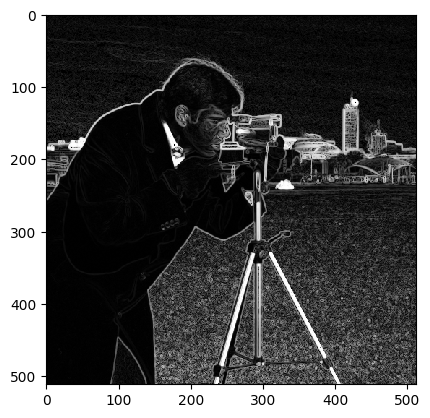

In [34]:
lambd=256

ppss=PPSLIPSpace()

sppsa=ppss.inverse_function(scharr(ppss.function(a,lambd)),lambd)

io.imsave('sppsa.png',sppsa)
sppsa=io.imread('sppsa.png')
print(contrast_img(sppsa,256,2))
plt.imshow(sppsa,cmap='gray',interpolation='nearest')

Lossy conversion from float64 to uint8. Range [0.0, 222.38384226043544]. Convert image to uint8 prior to saving to suppress this warning.


9.736930066397557


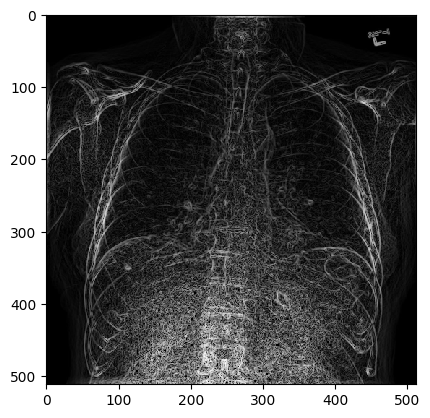

In [33]:
lambd=256

ppss=PPSLIPSpace()

sppsb=ppss.inverse_function(scharr(ppss.function(b,lambd)),lambd)

io.imsave('sppsb.png',sppsb)
sppsb=io.imread('sppsb.png')
print(contrast_img(sppsb,256,2))
plt.imshow(sppsb,cmap='gray',interpolation='nearest')